In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import utils
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [4]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [5]:
from SAE_model import SAE2
from keras import optimizers
from keras import losses
from keras import metrics

In [6]:
SAE2_model = SAE2(784, [150, 75])
SAE2_model.compile(optimizer=optimizers.Adam(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

d:\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
history = SAE2_model.fit(train_images, train_images, epochs=150, batch_size=128, validation_data=(test_images, test_images))

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7866 - loss: 0.3114 - val_binary_accuracy: 0.7985 - val_loss: 0.2459
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.7966 - loss: 0.2416 - val_binary_accuracy: 0.7962 - val_loss: 0.2160
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.7978 - loss: 0.2044 - val_binary_accuracy: 0.8004 - val_loss: 0.1787
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8012 - loss: 0.1765 - val_binary_accuracy: 0.8033 - val_loss: 0.1628
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8046 - loss: 0.1599 - val_binary_accuracy: 0.8052 - val_loss: 0.1492
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8066 - loss: 0.1477 - val_binary_accuracy: 0.8073 - val_loss: 0.1389
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.8081 - loss: 0.1380 - val_binary_accuracy: 0.8084 - val_loss: 0.1304

In [8]:
SAE2_model.save('models/SAE2.h5')

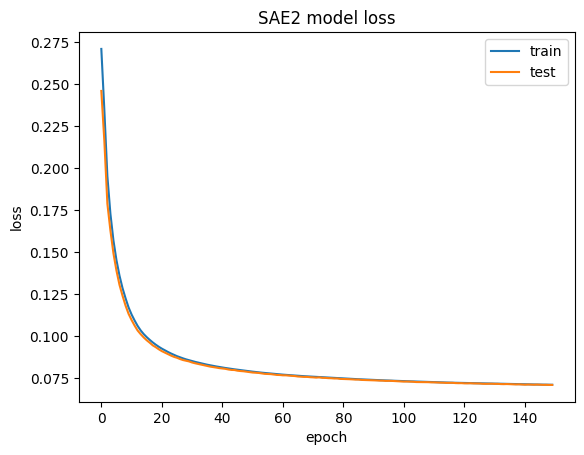

In [10]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SAE2 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()